In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("C:/Users/keert/Downloads/netflix1.csv")
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Co

In [3]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

# Handle missing critical fields
data.dropna(subset=['director', 'country'], inplace=True)

# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [6]:
data.drop(columns=['show_id'], inplace=True)

print("\nCleaned Dataset Overview:")
print(data.info())



Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   listed_in     8790 non-null   object        
 9   year_added    8790 non-null   int32         
 10  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 686.8+ KB
None


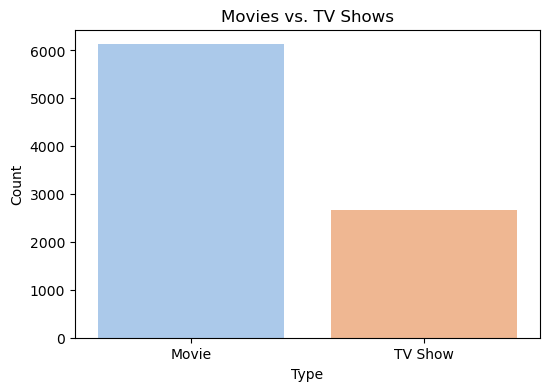

In [8]:
# Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=data, palette='pastel')
plt.title('Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

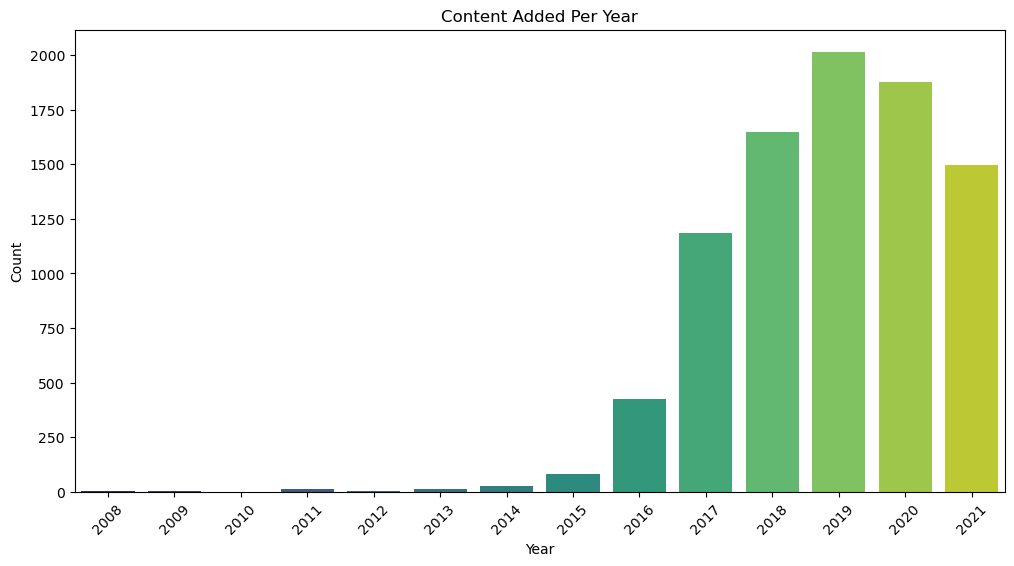

In [9]:
# Content Trends Over Time
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='viridis', order=sorted(data['year_added'].dropna().unique()))
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

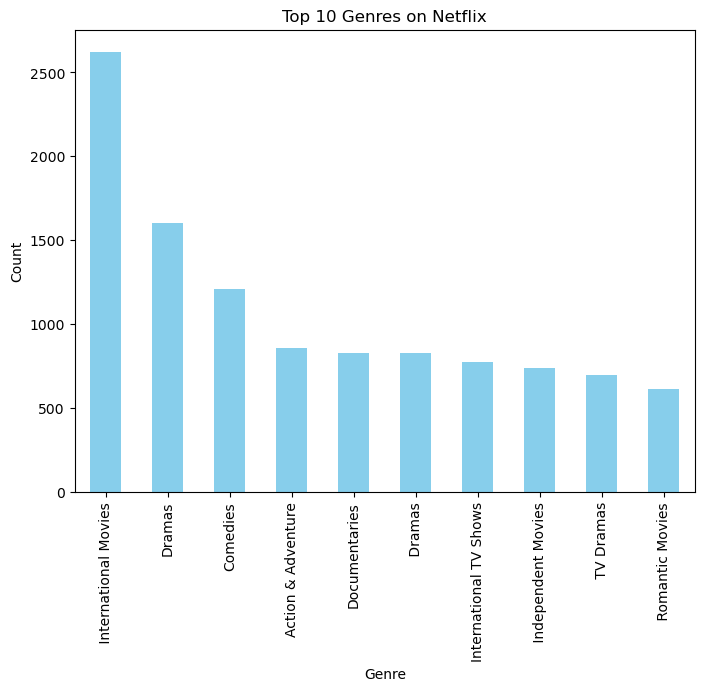

In [10]:
# Top 10 Genres
genres = data['listed_in'].str.split(',').explode().value_counts()[:10]
plt.figure(figsize=(8, 6))
genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

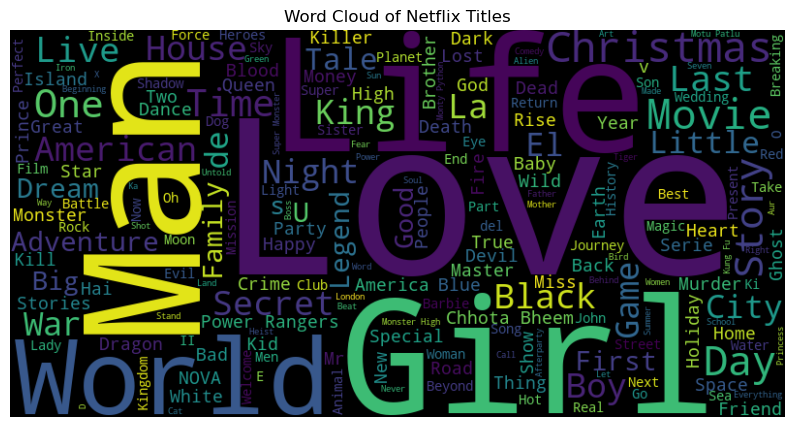

In [11]:
# Word Cloud of Titles
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data['title'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

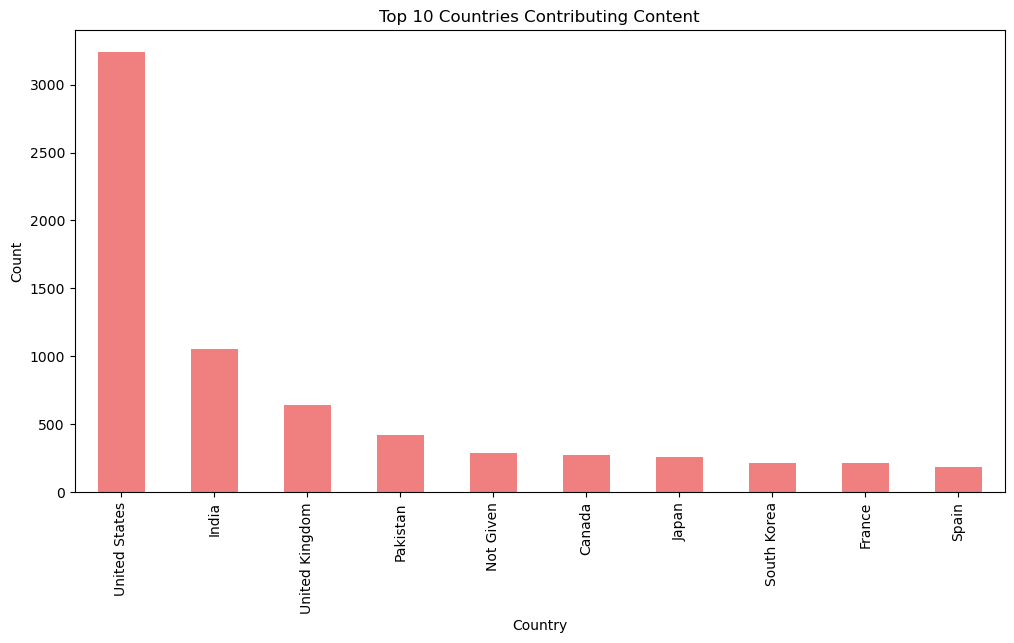

In [12]:
# Country Contribution
plt.figure(figsize=(12, 6))
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries Contributing Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [13]:
# Step 4: Save Cleaned Data for Further Use
cleaned_file_name = 'cleaned_netflix_data.csv'
data.to_csv(cleaned_file_name, index=False)
print(f"Cleaned dataset saved as {cleaned_file_name}.")

Cleaned dataset saved as cleaned_netflix_data.csv.


In [14]:
# Summary of Key Insights
print("\nKey Insights:")
print("1. Movies dominate Netflix's catalog compared to TV Shows.")
print("2. The majority of the content was added in recent years, especially after 2015.")
print("3. Popular genres include Dramas, Comedies, and Documentaries.")
print("4. The USA and India are the top contributors to Netflix's content.")


Key Insights:
1. Movies dominate Netflix's catalog compared to TV Shows.
2. The majority of the content was added in recent years, especially after 2015.
3. Popular genres include Dramas, Comedies, and Documentaries.
4. The USA and India are the top contributors to Netflix's content.
